### Import libraries

In [41]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

### Read .csv

In [42]:
data = pd.read_csv('diamonds.csv')

In [43]:
rick = pd.read_csv('rick_diamonds.csv')

#### Save backup files

In [44]:
data_bk = data.copy()

In [45]:
rick_bk = rick.copy()

### Understand database

In [46]:
data.describe()

,carat,depth,table,price,x,y,z
count,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000
mean,0.797817,61.751931,57.451161,3934.409644,5.730712,5.734333,3.538648
std,0.474126,1.430026,2.233450,3989.333861,1.121920,1.145344,0.706817
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


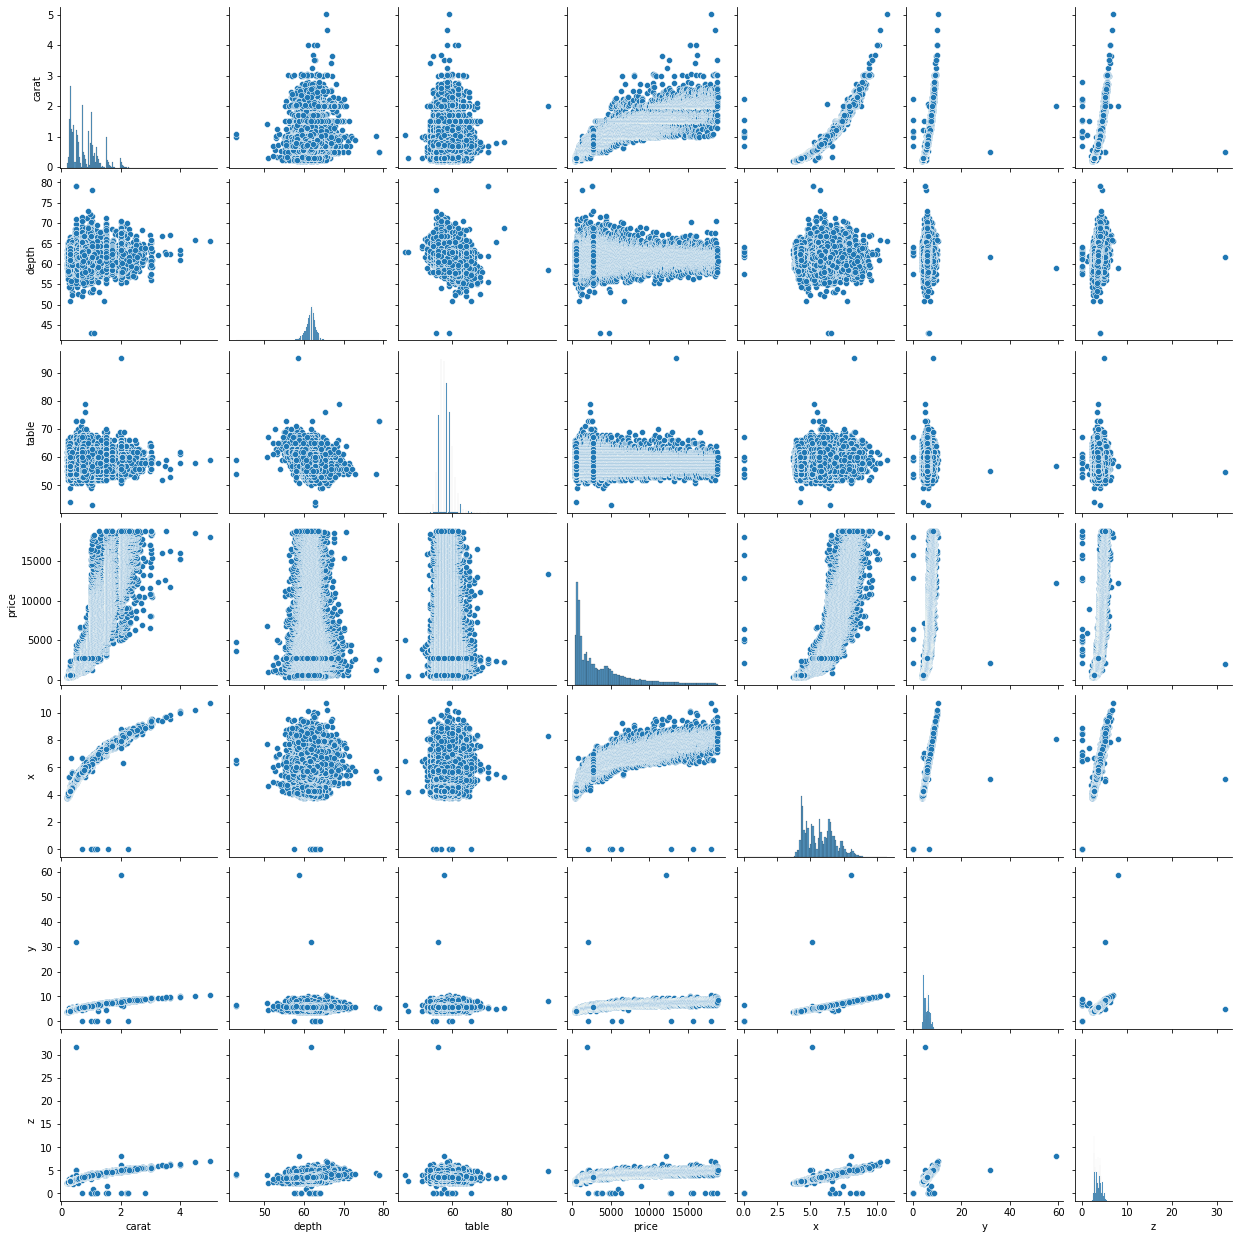

In [47]:
sns.pairplot(data);

In [48]:
data.corr()['price']

carat    0.922186
depth   -0.012037
table    0.127832
price    1.000000
x        0.885019
y        0.864059
z        0.860247
Name: price, dtype: float64

### Clean database

#### Disconsidered | Modifications that increased the root mean squared error

Transforming column 'price' into normal distribution to remove outliers

Result: no outliers found more than 3 standard deviations away from the mean

Test: removing outliers more than 2 std away from the mean increases the RMSE

In [49]:
transformed_data = boxcox(data['price'])[0]
boxcox_index = boxcox(data['price'])[1]

#sns.histplot(transformed_data);
#fig, ax = plt.subplots()
#stats.probplot(transformed_data, plot=ax);
#sns.boxplot(x = transformed_data);

mean = np.mean(transformed_data)
std = np.std(transformed_data)
lower_cut = mean - 3*std
upper_cut = mean + 3*std

data['transformed_price'] = transformed_data
data[(data['transformed_price'] < upper_cut) & (data['transformed_price'] > lower_cut)]

,carat,cut,color,clarity,depth,table,price,x,y,z,transformed_price
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4.791567
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4.793640
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4.807965
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,4.809985
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,4.811999
...,...,...,...,...,...,...,...,...,...,...,...
48935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58,6.137670
48936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,6.137670
48937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,6.137670
48938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,6.137670


### Compare historical data with Rick's data

In [50]:
data.describe()

,carat,depth,table,price,x,y,z,transformed_price
count,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000
mean,0.797817,61.751931,57.451161,3934.409644,5.730712,5.734333,3.538648,6.037865
std,0.474126,1.430026,2.233450,3989.333861,1.121920,1.145344,0.706817,0.599018
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,4.791567
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,5.489464
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000,6.056244
75%,1.040000,62.500000,59.000000,5331.250000,6.540000,6.540000,4.040000,6.515772
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,7.193865


In [51]:
rick.describe()

,carat,depth,table,x,y,z
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.799144,61.724680,57.516140,5.735516,5.736410,3.539576
std,0.472936,1.457691,2.244019,1.120300,1.110345,0.694733
min,0.200000,44.000000,50.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,4.720000,4.720000,2.910000
50%,0.710000,61.800000,57.000000,5.710000,5.720000,3.530000
75%,1.040000,62.500000,59.000000,6.530000,6.520000,4.032500
max,4.130000,73.600000,70.000000,10.000000,9.850000,6.430000


#### Removing historical data that won't be necessary when estimating prices

In [137]:
data.shape

(48917, 11)

In [136]:
data = data[~(data['carat'] < rick['carat'].min()) & ~(data['carat'] > rick['carat'].max())] # 2 rows removed
data = data[~(data['depth'] < rick['depth'].min()) & ~(data['depth'] > rick['depth'].max())] # 5 rows removed
data = data[~(data['table'] < rick['table'].min()) & ~(data['table'] > rick['table'].max())] # 10 rows removed
data = data[~(data['x'] < rick['x'].min()) & ~(data['x'] > rick['x'].max())] # 3 rows removed
data = data[~(data['y'] < rick['y'].min()) & ~(data['y'] > rick['y'].max())] # 2 rows removed
data = data[~(data['z'] < rick['z'].min()) & ~(data['z'] > rick['z'].max())] # 1 row removed

### Build model

#### Creating model using 'carat' given its correlation with price

In [177]:
model = LinearRegression()
X = data[['carat', 'depth', 'table', 'x', 'y', 'z']]
y = data['price']

#### Training model with historical data

In [178]:
model.fit(X,y)

LinearRegression()

#### Predicting new prices with model

In [179]:
y_pred = model.predict(X) 

#### Evaluating model

In [180]:
np.sqrt(mean_squared_error(y, y_pred))

1474.202596216251

In [181]:
r2_score(y, y_pred)

0.8633240109820781

In [182]:
a_co = model.coef_[0]
b_co = model.coef_[1]
c_co = model.coef_[2]
d_co = model.coef_[3]
e_co = model.coef_[4]
f_co = model.coef_[5]

In [183]:
print(f'y = ({a_co}*X) + ({b_co}*X) + ({c_co}*X) + ({d_co}*X) + ({e_co}*X) + ({f_co}*X) + ({model.intercept_})')

y = (10932.650948775034*X) + (-205.0199295206583*X) + (-98.882905054831*X) + (-2884.1489433407246*X) + (1553.8637383015584*X) + (40.51825816938505*X) + (21032.392785364926)


#### Plotting model

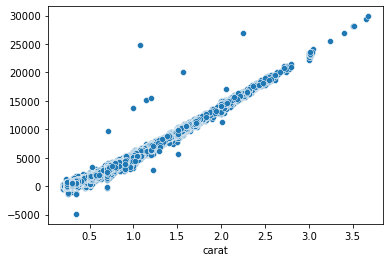

In [184]:
sns.scatterplot(x = data['carat'], y = y_pred);

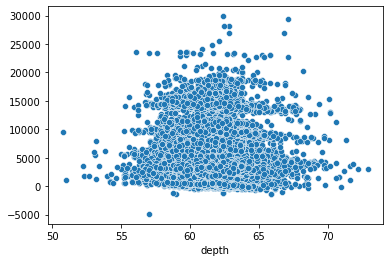

In [185]:
sns.scatterplot(x = data['depth'], y = y_pred);

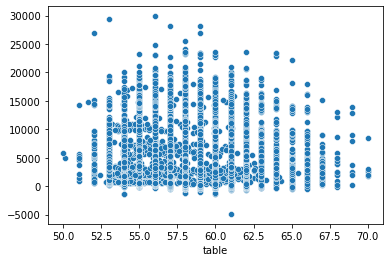

In [186]:
sns.scatterplot(x = data['table'], y = y_pred);

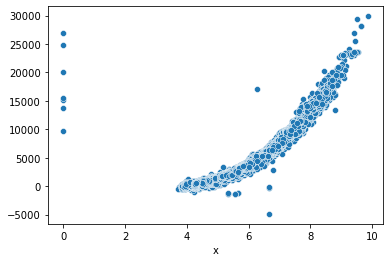

In [187]:
sns.scatterplot(x = data['x'], y = y_pred);

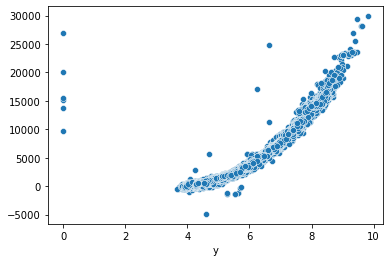

In [188]:
sns.scatterplot(x = data['y'], y = y_pred);

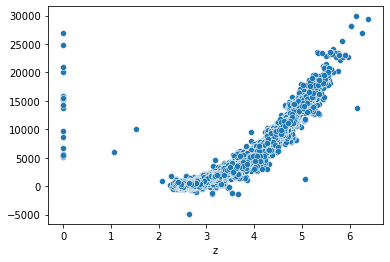

In [189]:
sns.scatterplot(x = data['z'], y = y_pred);

### Predict Rick's diamond prices

In [190]:
rick['price_predicted'] = a_co*rick['carat'] + b_co*rick['depth'] + c_co*rick['table'] + d_co*rick['x'] + e_co*rick['y'] + f_co*rick['z'] + model.intercept_

In [191]:
rick.to_csv('rick_prices.csv', index = False)

### Tries

#### 1) Your root mean squared error is 1605.15175707362
Using linear regression of carat related to price.

#### 2) Your root mean squared error is 1605.1525442863103
Using linear regression of carat related to price after removing price values more than 2 standard deviations away from the mean.

#### 3) Your root mean squared error is 1605.3464712564132
Using linear regression of carat related to price after removing historical data (carat, depth and table) that would't affect Rick's prices

#### 4) Your root mean squared error is 1599.1245298339925
Using linear regression of carat and depth related to price after removing historical data (carat, depth and table) that would't affect Rick's prices

#### 5) Your root mean squared error is 1583.834574315603
Using linear regression of carat, depth and table related to price after removing historical data (carat, depth and table) that would't affect Rick's prices

#### 6) Your root mean squared error is 1584.0322082194373
Using linear regression of carat, depth and table related to price after removing historical data (carat, depth, table, x, y and z) that would't affect Rick's prices

#### 7) Your root mean squared error is 1564.5429813765497
Using linear regression of carat, depth, table and x related to price after removing historical data (carat, depth, table, x, y and z) that would't affect Rick's prices

#### 8) Your root mean squared error is 1560.4168934863962
Using linear regression of carat, depth, table, x and y related to price after removing historical data (carat, depth, table, x, y and z) that would't affect Rick's prices

#### 9) Your root mean squared error is 1560.4696333722884
Using linear regression of carat, depth, table, x, y and z related to price after removing historical data (carat, depth, table, x, y and z) that would't affect Rick's prices